In [2]:
import numpy as np
import pandas as pd
import os
import sys
import random
import matplotlib.pyplot as plt
import operator
import seaborn as sns
import pymongo
from pymongo import MongoClient
from PIL import Image
import time

%matplotlib inline

In [3]:
ts = time.localtime()
a = (time.strftime("%d%m%Y %H%M%S", ts))
date = a[:8]
time = a[9:]
print("{}_{}".format(date,time))

16102019_103352


In [4]:
db_name = 'annon_v2'
host = '10.4.71.69'
port_number = int(27017)
ROOT = '/home/saqib/Desktop/test'

In [5]:
os.makedirs('{}/RPT-{}_{}/plots/'.format(ROOT,date,time))
os.makedirs('{}/RPT-{}_{}/csv/'.format(ROOT,date,time))

In [7]:
# path = '/home/saqib/Desktop/15102019_170429/plots/'
plot_path = '{}/RPT-{}_{}/plots/'.format(ROOT,date,time)
csv_path = '{}/RPT-{}_{}/csv/'.format(ROOT,date,time)

In [127]:
#to connect to remote db pass ip address and port number(if not set to default i.e. 27017)of remote db to MongoClient() 
client = MongoClient(host, port_number)

In [129]:
client.list_database_names()

['PXL-091019_181910_101019_100955',
 'PXL-161019_102459',
 'PXL-240919_175423_250919_122117',
 'admin',
 'annon',
 'annon_v2',
 'annon_v3',
 'config',
 'local']

In [134]:
if db_name == 'annon':
    db = client.annon
elif db_name == 'annon_v2':
    db = client.annon_v2
elif db_name == 'annon_v3':
    db = client.annon_v3

pymongo.database.Database

In [57]:
db.list_collection_names()

['IMAGELIST',
 'IMAGES',
 'ERRORS',
 'STATS',
 'AIDS',
 'ANNOTATIONS',
 'RELEASE',
 'LOG',
 'CLASSINFO']

In [58]:
stats_collection = db.STATS

In [59]:
ten = stats_collection.find()
entr = list(ten)
# print(entr)

In [60]:
df = pd.DataFrame(entr)
df.head()

,_id,rel_filename,annotation_per_label,annotation_rel_date,annotation_tool,annotator_id,created_on,image_name,image_part,image_per_label,...,modified_on,total_ant,total_ant_type,total_error_ant,total_error_empty_ant,total_error_img_notfound,total_error_img_reading,total_error_unlabeled_ant,total_img,total_lbl
0,5d9dd74a67a85d35b3825afd,images-p4-310519_AT2_via205_310519.json,"[52, 25, 26, 2, 4]",310519,via205,AT2,2019-10-09 18:19:13 +05:30,"[[271218_122102_16716_zed_l_183.jpg, 271218_12...",images-p4,"[27, 14, 26, 2, 4]",...,None,109,"[{'polygon': 103, 'rect': 6}]",0,0,0,0,0,27,5
1,5d9dd75e67a85d35b3825c67,images-p1-030419_AT3_via205_040419.json,"[226, 70]",040419,via205,AT3,2019-10-09 18:19:34 +05:30,"[[291018_144257_16716_zed_l_076.jpg, 291018_14...",images-p1,"[70, 70]",...,None,296,[{'polygon': 296}],0,0,0,0,0,70,2
2,5d9dd76c67a85d35b3825fe5,images-p3-250219_AT3_via205_080319.json,"[294, 6, 83, 110, 257, 30, 51, 2, 7]",080319,via205,AT3,2019-10-09 18:19:48 +05:30,"[[291018_143933_16718_zed_l_054.jpg, 291018_14...",images-p3,"[65, 6, 83, 82, 89, 30, 50, 2, 7]",...,None,840,"[{'polygon': 821, 'rect': 19}]",0,0,0,0,0,107,9
3,5d9dd77b67a85d35b3826842,images-p2-050219_AT3_via205_050219.json,"[339, 287, 6, 26, 76, 61, 75, 43, 5]",050219,via205,AT3,2019-10-09 18:20:03 +05:30,"[[291018_105116_16716_zed_l_113.jpg, 291018_10...",images-p2,"[140, 140, 6, 26, 76, 33, 53, 28, 5]",...,None,918,"[{'polygon': 903, 'rect': 15}]",0,0,0,0,0,149,9
4,5d9dd77f67a85d35b38271f6,images-p1-120619_AT5_via205_280619.json,[53],280619,via205,AT5,2019-10-09 18:20:07 +05:30,"[[311218_105959_16718_zed_l_518.jpg, 311218_11...",images-p1,[53],...,None,53,[{'polygon': 53}],0,0,0,0,0,53,1


In [61]:
img_per_label = {}
for i in range(len(df)):
    for j in range(len(df.label[i])):
        if df.label[i][j] in img_per_label.keys():
            img_per_label[df.label[i][j]] = img_per_label[df.label[i][j]] + df.image_per_label[i][j]
        else:
            img_per_label[df.label[i][j]] = df.image_per_label[i][j]

In [62]:
sorted_img_per_label = sorted(img_per_label.items(), reverse=True, key=operator.itemgetter(1))

sorted_img_per_label

[('traffic_sign', 15838),
 ('signage', 13609),
 ('street_light', 8208),
 ('traffic_sign_frame', 7907),
 ('pole', 7702),
 ('traffic_light', 7217),
 ('loose_material', 6127),
 ('footpath_polygon', 4261),
 ('cctv_camera', 3270),
 ('road_polygon', 3014),
 ('reflector', 2995),
 ('lane_marking', 2495),
 ('flyover_pillar', 2404),
 ('billboard', 1889),
 ('barricade', 1569),
 ('speed_breaker', 818),
 ('crosswalk', 699),
 ('roadside_junction_box', 661),
 ('booth', 553),
 ('pothole', 526),
 ('roadside_spot_light', 499),
 ('transformer', 409),
 ('garbage_can', 111),
 ('lane_arrow_marking', 71),
 ('garbage_pile', 60),
 ('traffic_pole', 1)]

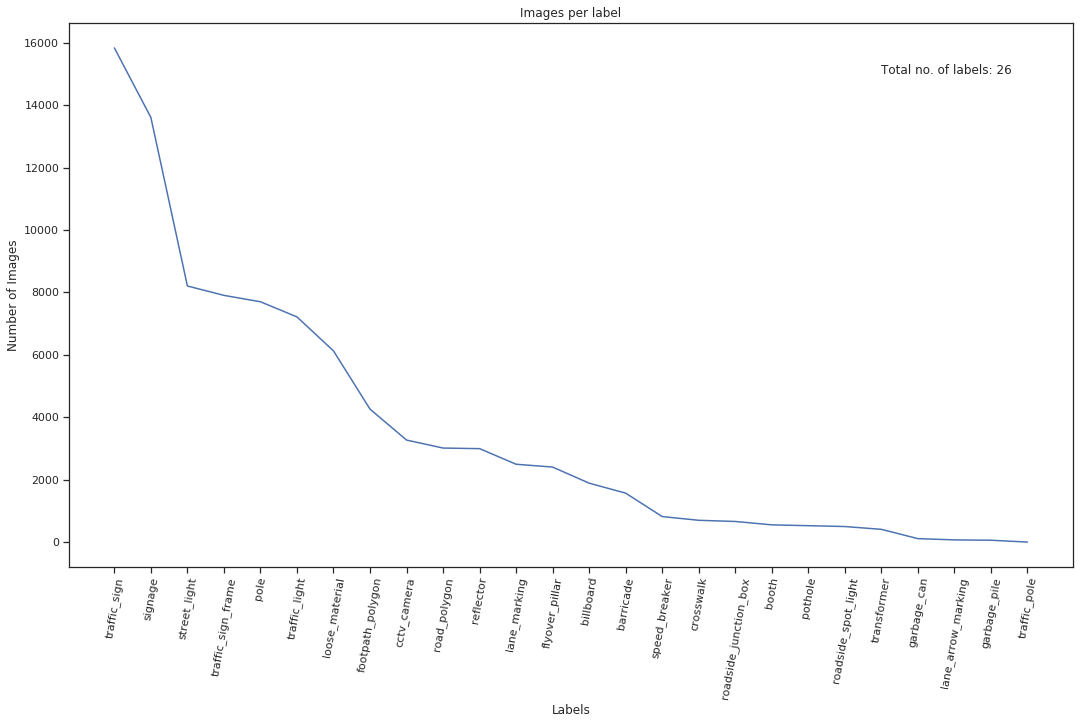

In [63]:
lists = (sorted_img_per_label) # sorted by key, return a list of tuples
sns.set(style="ticks")
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(18,10))
plt.xticks(rotation=80)
plt.title("Images per label")
plt.xlabel("Labels")
plt.ylabel("Number of Images")

po = len(list(img_per_label))

plt.plot(x, y)
plt.text(x=21, y=15000, s="Total no. of labels: {}".format(po), size=12)

plt.savefig('{}images_per_label_line'.format(plot_path), dpi=100, bbox_inches='tight')

plt.show()evaulate_data_files['rpt_metric_filepath']
evaulate_data_files['rpt_summary_filepath']

In [64]:
img_per_label_df = pd.DataFrame(list(img_per_label.items()))
img_per_label_df.columns = ["Label", "Images"]
img_per_label_df.sort_values('Images', ascending=False, inplace=True)
img_per_label_df.head()

,Label,Images
3,traffic_sign,15838
9,signage,13609
10,street_light,8208
1,traffic_sign_frame,7907
7,pole,7702


In [65]:
#Uncomment next line to export csv file of img_per_label_df dataframe
img_per_label_df.to_csv('{}image_per_label.csv'.format(csv_path))

In [66]:
# for i,j in enumerate(sorted_img_per_label):
#     print(i, j[0], j[1])

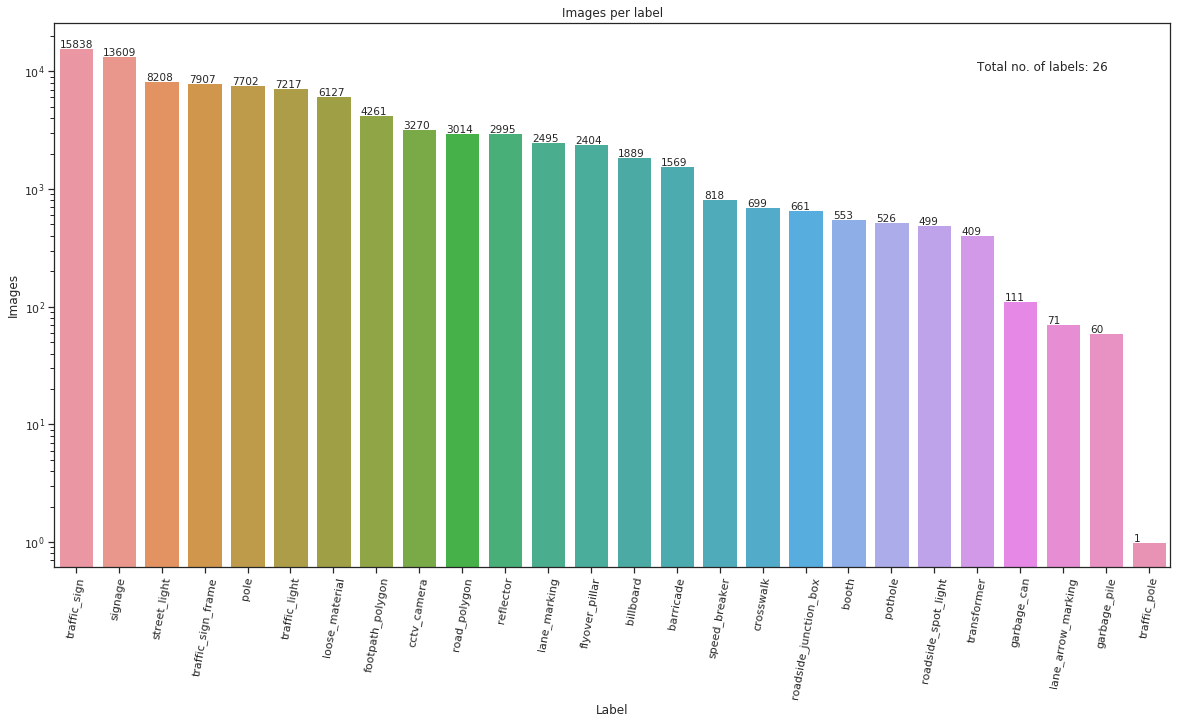

In [67]:
# sns.set_palette('Pastel1')
plt.figure(figsize=(20,10))
axes = sns.barplot(x='Label', y = 'Images', data =img_per_label_df)
plt.yscale("log")

plt.xticks(rotation=80)

for i, j in enumerate(sorted_img_per_label):
    plt.text(x = i-0.361 , y = j[1], s = j[1], size=10.5)

ko = len(sorted_img_per_label)
    
plt.text(x=21, y=10000, s="Total no. of labels: {}".format(ko), size = 12)
    
plt.title("Images per label")
#plt.bar(x, y)

plt.savefig('{}/images_per_label_bar'.format(plot_path), dpi=100, bbox_inches='tight')

plt.show()

In [68]:
annot_label = {}
for i in range(len(df)):
    for j in range(len(df.label[i])):
        if df.label[i][j] in annot_label.keys():
            annot_label[df.label[i][j]] = annot_label[df.label[i][j]] + df.annotation_per_label[i][j]
        else:
            annot_label[df.label[i][j]] = df.annotation_per_label[i][j]

In [69]:
sorted_annot_label = sorted(annot_label.items(), reverse=True, key=operator.itemgetter(1))

sorted_annot_label

[('street_light', 31839),
 ('pole', 25245),
 ('traffic_sign', 25189),
 ('signage', 24707),
 ('traffic_light', 19388),
 ('traffic_sign_frame', 14983),
 ('flyover_pillar', 11440),
 ('reflector', 10693),
 ('loose_material', 9831),
 ('lane_marking', 7181),
 ('footpath_polygon', 5716),
 ('road_polygon', 5381),
 ('billboard', 4635),
 ('cctv_camera', 4469),
 ('barricade', 2157),
 ('speed_breaker', 918),
 ('crosswalk', 847),
 ('roadside_junction_box', 791),
 ('pothole', 723),
 ('roadside_spot_light', 591),
 ('booth', 555),
 ('transformer', 467),
 ('garbage_can', 129),
 ('lane_arrow_marking', 87),
 ('garbage_pile', 60),
 ('traffic_pole', 2)]

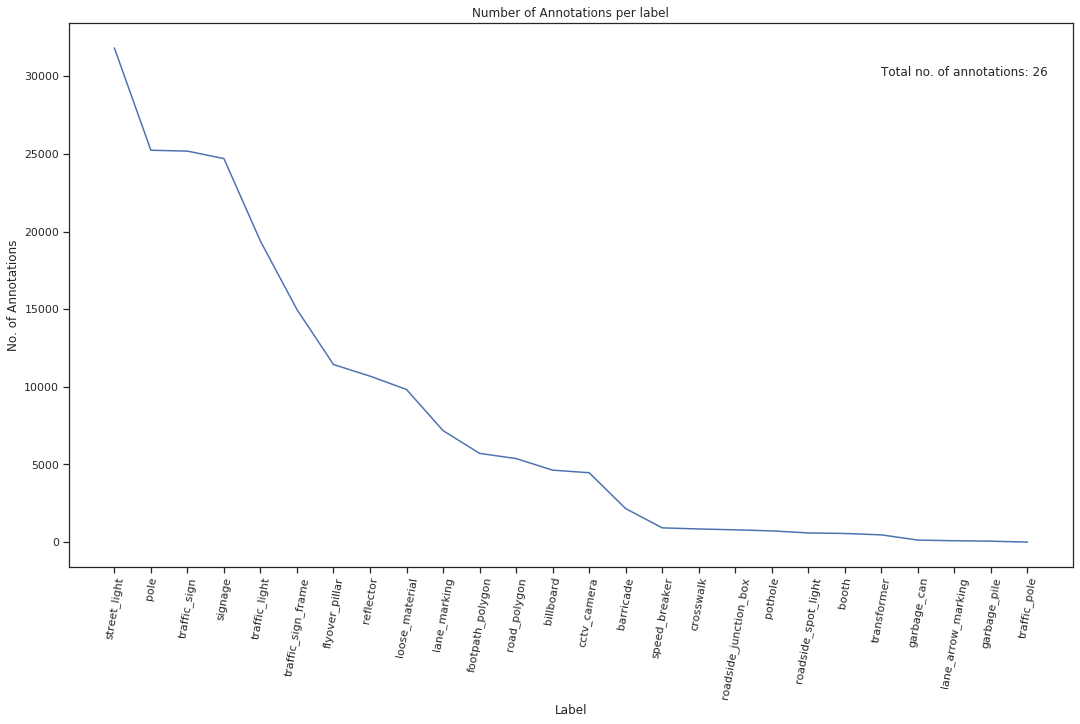

In [70]:
lists = (sorted_annot_label) # sorted by key, return a list of tuples
sns.set(style="ticks")
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(18,10))
plt.xticks(rotation=80)
plt.xlabel("Label")
plt.ylabel("No. of Annotations")
plt.plot(x, y)
plt.title("Number of Annotations per label")
po = len(list(sorted_annot_label))
plt.text(x=21, y=30000, s="Total no. of annotations: {}".format(po), size=12)

plt.savefig('{}/annotations_per_label_line'.format(plot_path), dpi=100, bbox_inches='tight')

plt.show()

In [71]:
annot_label_df = pd.DataFrame(list(annot_label.items()))
annot_label_df.columns = ['Label', 'Annotations']
annot_label_df.sort_values('Annotations', ascending=False, inplace=True)
annot_label_df.head()

,Label,Annotations
10,street_light,31839
7,pole,25245
3,traffic_sign,25189
9,signage,24707
11,traffic_light,19388


In [72]:
#Uncomment next line to export csv file of annot_label_df dataframe
annot_label_df.to_csv('{}/annotations_per_label.csv'.format(csv_path))

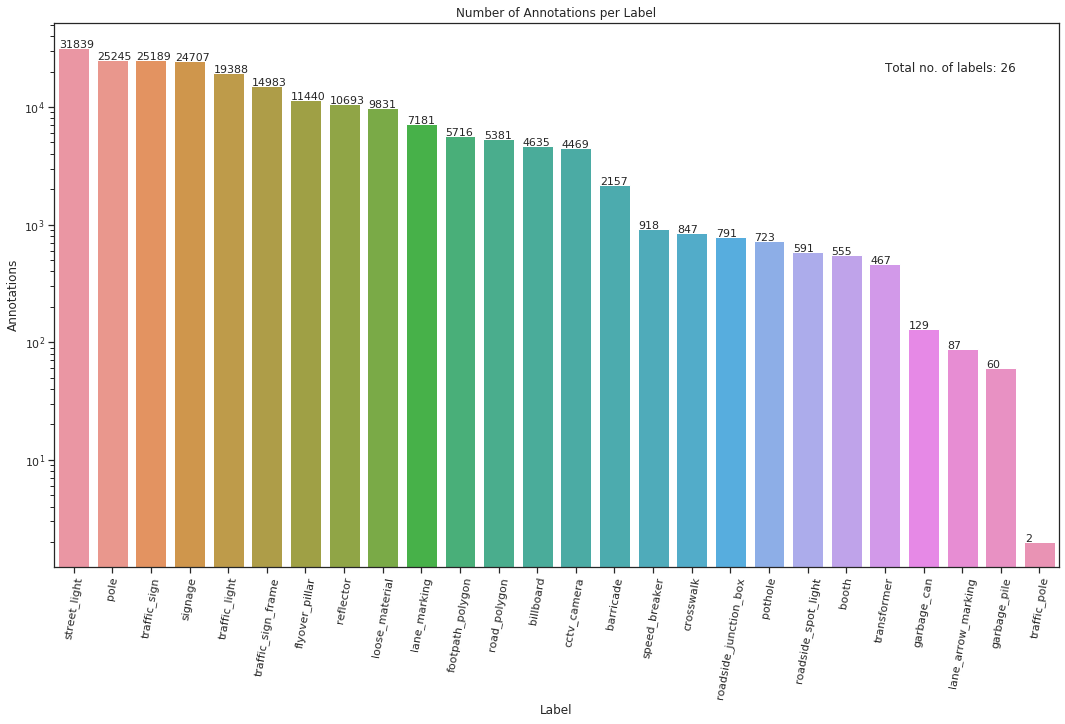

In [73]:
# sns.set(style='whitegrid', color_codes=True)
plt.figure(figsize=(18,10))
sns.barplot(x='Label', y = 'Annotations', data =annot_label_df)
plt.yscale("log")

plt.xticks(rotation=80)
plt.title("Number of Annotations per Label")

for i, j in enumerate(sorted_annot_label):
    plt.text(x = i-0.38 , y = j[1], s = j[1], size=11)

lo = len(sorted_annot_label)

plt.text(x= 21, y=20000, s="Total no. of labels: {}".format(lo), size=12)

plt.savefig('{}/annotations_per_label_bar'.format(plot_path), dpi=100, bbox_inches='tight')

plt.show()

In [74]:
data_df = img_per_label_df.copy()
data_df['Annotations'] = annot_label_df['Annotations']

In [75]:
data_df.head()

,Label,Images,Annotations
3,traffic_sign,15838,25189
9,signage,13609,24707
10,street_light,8208,31839
1,traffic_sign_frame,7907,14983
7,pole,7702,25245


In [76]:
#Uncomment next line to export csv file of annot_label_df dataframe
data_df.to_csv('{}/annotations_and_images_per_label.csv'.format(csv_path))

In [77]:
plot_df = pd.melt(data_df, id_vars='Label', var_name='Legend', value_name='Total_Number')

In [78]:
plot_df.head()

,Label,Legend,Total_Number
0,traffic_sign,Images,15838
1,signage,Images,13609
2,street_light,Images,8208
3,traffic_sign_frame,Images,7907
4,pole,Images,7702


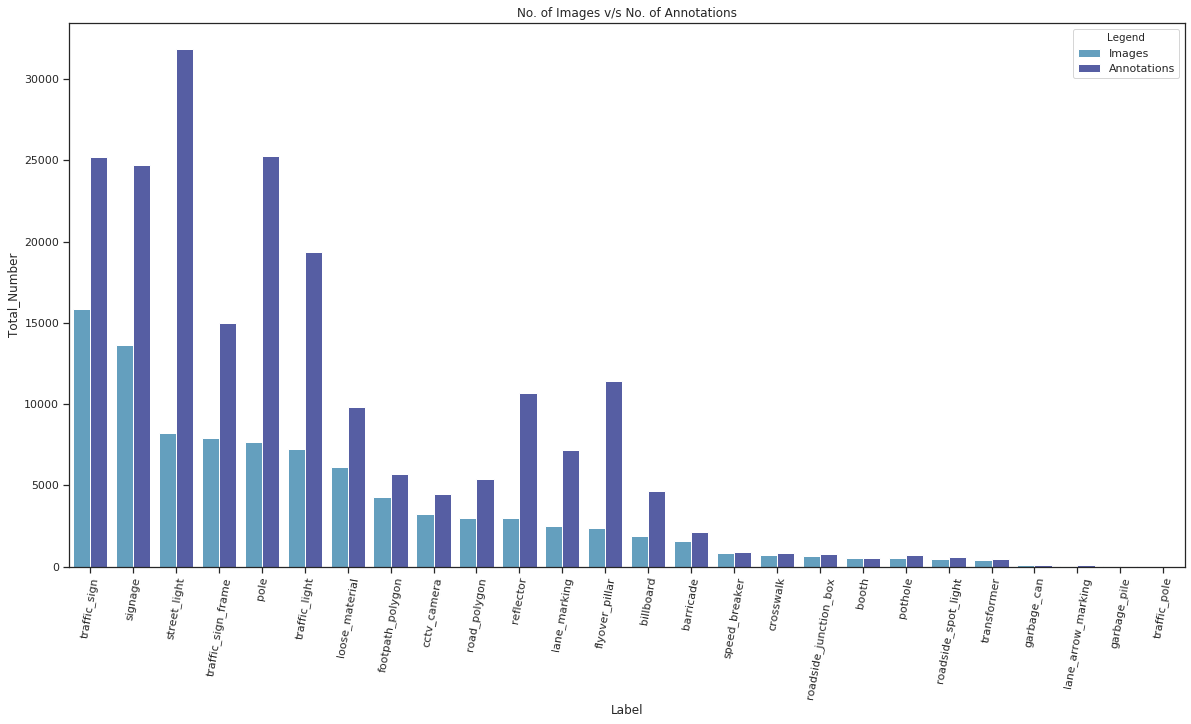

In [79]:
# sns.set(style='whitegrid')
sns.set_palette("icefire")
plt.figure(figsize=(20,10))
sns.barplot(x='Label', y = 'Total_Number', hue='Legend', data =plot_df)
plt.xticks(rotation=80)
plt.title("No. of Images v/s No. of Annotations")

plt.savefig('{}/number_of_images_vs_annotations'.format(plot_path), dpi=100, bbox_inches='tight')

plt.show()

In [80]:
####Annotation Visualization

In [81]:
annon_collection = db.ANNOTATIONS

In [82]:
eleven = annon_collection.find()
entr1 = list(eleven)

In [83]:
df_annon = pd.DataFrame(entr1)
df_annon.head()

,_id,ant_id,anndb_id,annon_index,annotation_rel_date,annotation_tool,annotator_id,ant_type,bbox,bboxarea,...,image_name,image_part,image_rel_date,img_id,lbl_id,maskarea,modified_on,region_attributes,rel_filename,shape_attributes
0,5d9dd74b67a85d35b3825b71,ant-0f1815ca-c2fd-442f-9071-35b887539d4b,091019_181910,0,310519,via205,AT2,polygon,"{'ymin': 295, 'xmin': 1244, 'ymax': 722, 'xmax...",288225,...,271218_122102_16716_zed_l_183.jpg,images-p4,310519,img-03b74d65-8545-452b-a0d9-6fb1c8113773,loose_material,14409,None,"{'Label': 'loose_material', 'Color': '', 'Arro...",images-p4-310519_AT2_via205_310519.json,"{'name': 'polygon', 'all_points_x': [1918, 191..."
1,5d9dd74b67a85d35b3825b73,ant-162e4938-859c-4c43-ba98-5039362dc2ce,091019_181910,1,310519,via205,AT2,polygon,"{'ymin': 198, 'xmin': 1476, 'ymax': 247, 'xmax...",490,...,271218_122102_16716_zed_l_183.jpg,images-p4,310519,img-03b74d65-8545-452b-a0d9-6fb1c8113773,traffic_sign_frame,154,None,"{'Label': 'traffic_sign_frame', 'Color': '', '...",images-p4-310519_AT2_via205_310519.json,"{'name': 'polygon', 'all_points_x': [1483, 147..."
2,5d9dd74b67a85d35b3825b75,ant-8380f2ae-5352-4598-b3bf-11dcd287296f,091019_181910,2,310519,via205,AT2,polygon,"{'ymin': 202, 'xmin': 1493, 'ymax': 232, 'xmax...",210,...,271218_122102_16716_zed_l_183.jpg,images-p4,310519,img-03b74d65-8545-452b-a0d9-6fb1c8113773,traffic_sign_frame,65,None,"{'Label': 'traffic_sign_frame', 'Color': '', '...",images-p4-310519_AT2_via205_310519.json,"{'name': 'polygon', 'all_points_x': [1498, 149..."
3,5d9dd74b67a85d35b3825b77,ant-4a0e4d37-9f9a-48cb-9574-6860ee8fc8d1,091019_181910,3,310519,via205,AT2,polygon,"{'ymin': 227, 'xmin': 1313, 'ymax': 339, 'xmax...",67984,...,271218_122102_16716_zed_l_183.jpg,images-p4,310519,img-03b74d65-8545-452b-a0d9-6fb1c8113773,footpath_polygon,3817,None,"{'Label': 'footpath_polygon', 'Color': '', 'Ar...",images-p4-310519_AT2_via205_310519.json,"{'name': 'polygon', 'all_points_x': [1918, 192..."
4,5d9dd74b67a85d35b3825b79,ant-ecc50f8d-0b7a-4fcd-922f-0c1db599725c,091019_181910,0,310519,via205,AT2,polygon,"{'ymin': 515, 'xmin': 678, 'ymax': 1079, 'xmax...",652548,...,271218_122102_16717_zed_l_303.jpg,images-p4,310519,img-fe9681cb-2c49-4997-957b-c527df59caed,loose_material,34090,None,"{'Label': 'loose_material', 'Color': '', 'Arro...",images-p4-310519_AT2_via205_310519.json,"{'name': 'polygon', 'all_points_x': [1729, 183..."


In [84]:
annot_df = df_annon[["img_id","rel_filename", "ant_type", "bboxarea", "maskarea", "lbl_id"]]
annot_df.head()

,img_id,rel_filename,ant_type,bboxarea,maskarea,lbl_id
0,img-03b74d65-8545-452b-a0d9-6fb1c8113773,images-p4-310519_AT2_via205_310519.json,polygon,288225,14409,loose_material
1,img-03b74d65-8545-452b-a0d9-6fb1c8113773,images-p4-310519_AT2_via205_310519.json,polygon,490,154,traffic_sign_frame
2,img-03b74d65-8545-452b-a0d9-6fb1c8113773,images-p4-310519_AT2_via205_310519.json,polygon,210,65,traffic_sign_frame
3,img-03b74d65-8545-452b-a0d9-6fb1c8113773,images-p4-310519_AT2_via205_310519.json,polygon,67984,3817,footpath_polygon
4,img-fe9681cb-2c49-4997-957b-c527df59caed,images-p4-310519_AT2_via205_310519.json,polygon,652548,34090,loose_material


In [85]:
lbl = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="rect":
        if annot_df.img_id[i] in lbl.keys():
            lbl[annot_df.img_id[i]] = lbl[annot_df.img_id[i]] + annot_df.bboxarea[i]
        else:
            lbl[annot_df.img_id[i]] = annot_df.bboxarea[i]

In [86]:
lbl_df = pd.DataFrame(list(lbl.items()))
lbl_df.columns = ["image_id", "bbox_area"]
lbl_df.head()

,image_id,bbox_area
0,img-fe9681cb-2c49-4997-957b-c527df59caed,585
1,img-82ac4c4a-96bc-4712-bb15-64043601ada9,1479
2,img-b297f55a-bb12-4b87-97a1-da05024ba46c,88
3,img-3ded40cf-1ad9-4e41-9dad-d5524a6d8e44,285
4,img-f7e94bcf-5362-4616-9385-7e6e2b213af2,140


In [87]:
lbl_df.bbox_area = (lbl_df.bbox_area/2073600)*100
lbl_df.head()

,image_id,bbox_area
0,img-fe9681cb-2c49-4997-957b-c527df59caed,0.028212
1,img-82ac4c4a-96bc-4712-bb15-64043601ada9,0.071325
2,img-b297f55a-bb12-4b87-97a1-da05024ba46c,0.004244
3,img-3ded40cf-1ad9-4e41-9dad-d5524a6d8e44,0.013744
4,img-f7e94bcf-5362-4616-9385-7e6e2b213af2,0.006752


In [43]:
#Uncomment next line to export csv file of img_per_label_df dataframe
#lbl_df.to_csv('bbox_area_per_image.csv')

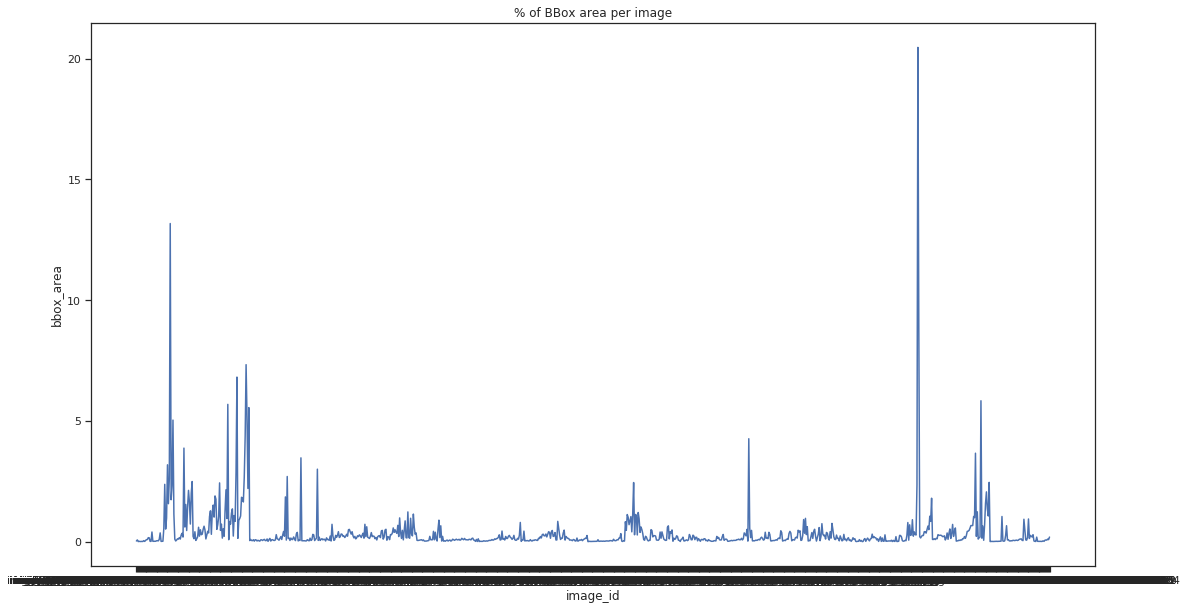

In [100]:
sns.set(style='ticks', color_codes=True)

plt.figure(figsize=(18,10))

# sns.lineplot(x="image_id", y="bbox_area", data=lbl_df, sort=False)
sns.lineplot(x="image_id", y="bbox_area", data=lbl_df[:1000], sort=False)
plt.title("% of BBox area per image")

plt.savefig('{}/percentage_of_bbox_area_per_image'.format(plot_path), dpi=100, bbox_inches='tight')

plt.show()

In [88]:
lbl_p = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="polygon":
        if annot_df.img_id[i] in lbl_p.keys():
            lbl_p[annot_df.img_id[i]] = lbl_p[annot_df.img_id[i]] + annot_df.maskarea[i]
        else:
            lbl_p[annot_df.img_id[i]] = annot_df.maskarea[i]

In [89]:
lbl_p_df = pd.DataFrame(list(lbl_p.items()))
lbl_p_df.columns = ["image_id", "mask_area"]
lbl_p_df.head()

,image_id,mask_area
0,img-03b74d65-8545-452b-a0d9-6fb1c8113773,18445
1,img-fe9681cb-2c49-4997-957b-c527df59caed,45654
2,img-416ef6d6-3043-4686-8291-1941a3083706,20968
3,img-82ac4c4a-96bc-4712-bb15-64043601ada9,48872
4,img-75f44309-1824-40fb-85a6-968c848027a2,3283


In [90]:
lbl_p_df.mask_area = (lbl_p_df.mask_area/2073600)*100
lbl_p_df.tail()

,image_id,mask_area
33852,img-72ff1482-9342-49ef-95da-680b2337938d,0.165461
33853,img-5eacc6c5-f9ed-49d3-a381-59103588a304,0.803096
33854,img-e783f7d6-69e3-43b9-942c-193dbc6e3825,0.532649
33855,img-93895e82-dd09-4c1c-ab36-434053c4999a,0.159819
33856,img-33d74913-e9b7-40c1-b7f0-5f1b4f32ab88,0.976273


In [91]:
#Uncomment next line to export csv file of img_per_label_df dataframe
#lbl_p_df.to_csv('mask_area_per_image.csv')

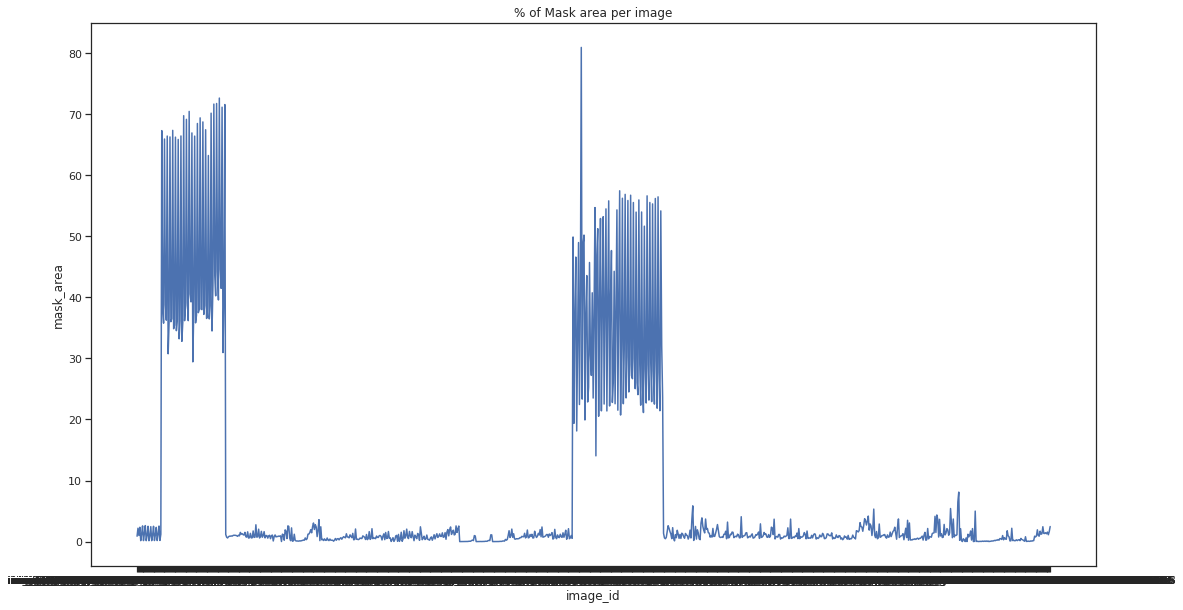

In [99]:
sns.set(style='ticks')
plt.figure(figsize=(18,10))
# sns.lineplot(x="image_id", y="mask_area", data=lbl_p_df, sort=False)
sns.lineplot(x="image_id", y="mask_area", data=lbl_p_df[:1000], sort=False)
plt.title("% of Mask area per image")

plt.savefig('{}/percentage_of_mask_area_per_image'.format(plot_path), dpi=100, bbox_inches='tight')

plt.show()

In [92]:
lbl_rf = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="polygon":
        if annot_df.img_id[i] in lbl_rf.keys():
            pass
        else:
            lbl_rf[annot_df.img_id[i]] = annot_df.rel_filename[i]

In [93]:
lbl_rf_df = pd.DataFrame(list(lbl_rf.items()))
lbl_rf_df.columns = ["image_id", "rel_filename"]
lbl_rf_df.head()

,image_id,rel_filename
0,img-03b74d65-8545-452b-a0d9-6fb1c8113773,images-p4-310519_AT2_via205_310519.json
1,img-fe9681cb-2c49-4997-957b-c527df59caed,images-p4-310519_AT2_via205_310519.json
2,img-416ef6d6-3043-4686-8291-1941a3083706,images-p4-310519_AT2_via205_310519.json
3,img-82ac4c4a-96bc-4712-bb15-64043601ada9,images-p4-310519_AT2_via205_310519.json
4,img-75f44309-1824-40fb-85a6-968c848027a2,images-p4-310519_AT2_via205_310519.json


In [94]:
lbl_p_df["rel_filename"] = lbl_rf_df["rel_filename"]
lbl_p_df

,image_id,mask_area,rel_filename
0,img-03b74d65-8545-452b-a0d9-6fb1c8113773,0.889516,images-p4-310519_AT2_via205_310519.json
1,img-fe9681cb-2c49-4997-957b-c527df59caed,2.201678,images-p4-310519_AT2_via205_310519.json
2,img-416ef6d6-3043-4686-8291-1941a3083706,1.011188,images-p4-310519_AT2_via205_310519.json
3,img-82ac4c4a-96bc-4712-bb15-64043601ada9,2.356867,images-p4-310519_AT2_via205_310519.json
4,img-75f44309-1824-40fb-85a6-968c848027a2,0.158324,images-p4-310519_AT2_via205_310519.json
...,...,...,...
33852,img-72ff1482-9342-49ef-95da-680b2337938d,0.165461,images-p1-060519_AT1_via205_170519.json
33853,img-5eacc6c5-f9ed-49d3-a381-59103588a304,0.803096,images-p1-060519_AT1_via205_170519.json
33854,img-e783f7d6-69e3-43b9-942c-193dbc6e3825,0.532649,images-p1-060519_AT1_via205_170519.json
33855,img-93895e82-dd09-4c1c-ab36-434053c4999a,0.159819,images-p1-060519_AT1_via205_170519.json


In [95]:
area_label = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="polygon":
        if annot_df.lbl_id[i] in area_label.keys():
            area_label[annot_df.lbl_id[i]] = area_label[annot_df.lbl_id[i]] + annot_df.maskarea[i]
        else:
            area_label[annot_df.lbl_id[i]] = annot_df.maskarea[i]

In [96]:
area_label_df = pd.DataFrame(list(area_label.items()))
area_label_df.columns = ["lbl_id", "mask_area"]
area_label_df.sort_values('mask_area', ascending=False, inplace=True)
area_label_df.tail()

,lbl_id,mask_area
6,roadside_spot_light,1116954
24,lane_arrow_marking,568545
16,garbage_can,297715
14,cctv_camera,254203
25,traffic_pole,2189


In [97]:
#Uncomment next line to export csv file of img_per_label_df dataframe
area_label_df.to_csv('{}/mask_area_per_label.csv'.format(csv_path))

In [98]:
sorted_area_label = sorted(area_label.items(), reverse=True, key=operator.itemgetter(1))

sorted_area_label

[('road_polygon', 2481871788),
 ('loose_material', 562035085),
 ('footpath_polygon', 308624445),
 ('flyover_pillar', 226986153),
 ('speed_breaker', 91559438),
 ('crosswalk', 89087176),
 ('pole', 76303326),
 ('lane_marking', 71433412),
 ('street_light', 67531388),
 ('signage', 58275293),
 ('traffic_sign', 25942943),
 ('traffic_sign_frame', 23300661),
 ('pothole', 18188490),
 ('billboard', 14766685),
 ('barricade', 10827698),
 ('garbage_pile', 6127418),
 ('roadside_junction_box', 4091467),
 ('traffic_light', 3358038),
 ('booth', 2984839),
 ('reflector', 1288266),
 ('transformer', 1286905),
 ('roadside_spot_light', 1116954),
 ('lane_arrow_marking', 568545),
 ('garbage_can', 297715),
 ('cctv_camera', 254203),
 ('traffic_pole', 2189)]

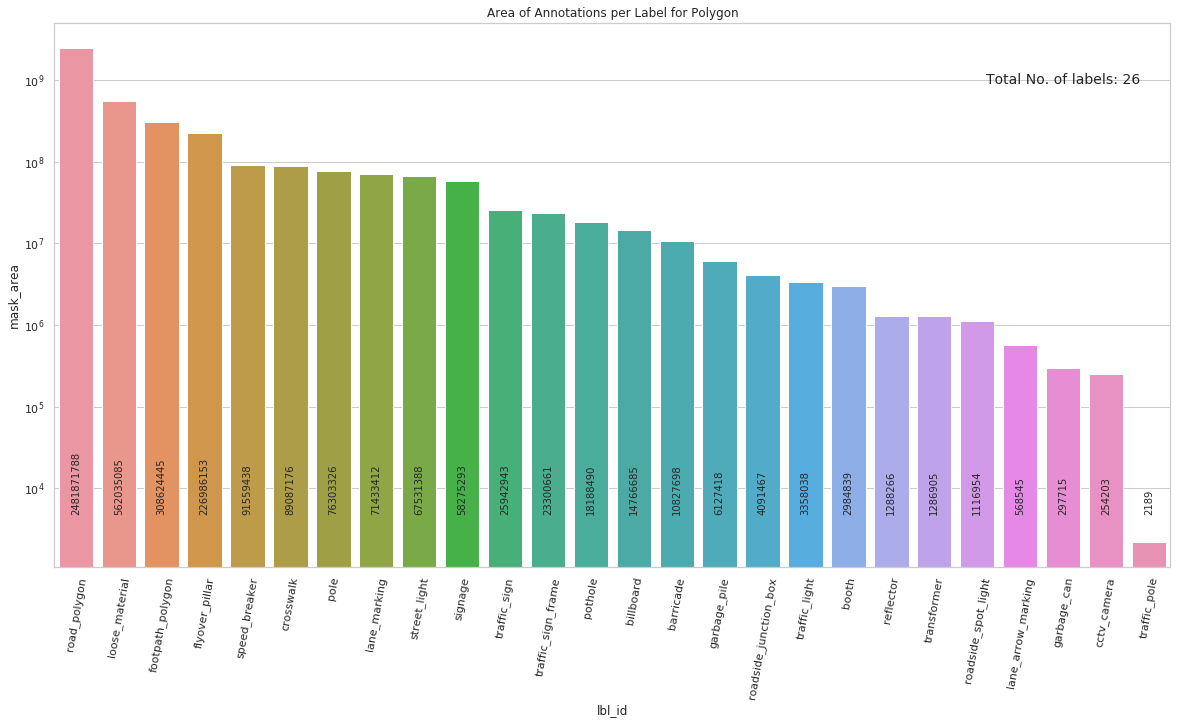

In [99]:
sns.set(style='whitegrid', color_codes=True)
plt.figure(figsize=(20,10))
sns.barplot(x='lbl_id', y = 'mask_area', data =area_label_df)
plt.yscale("log")
plt.xticks(rotation=80)
plt.title("Area of Annotations per Label for Polygon")

for i, j in enumerate(sorted_area_label):
    plt.text(x = i , y = 5000, s = j[1], size=10, rotation=90, horizontalalignment='center')
plt.text(x=23, y=1000000000, s="Total No. of labels: {}".format(len(area_label_df)), horizontalalignment='center', verticalalignment='center', size=14)

plt.savefig('{}/area_of_annotation_per_label_polygon'.format(plot_path), dpi=100, bbox_inches='tight')

plt.show()

In [100]:
area_label_bbox = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="rect":
        if annot_df.lbl_id[i] in area_label_bbox.keys():
            area_label_bbox[annot_df.lbl_id[i]] = area_label_bbox[annot_df.lbl_id[i]] + annot_df.bboxarea[i]
        else:
            area_label_bbox[annot_df.lbl_id[i]] = annot_df.bboxarea[i]

In [101]:
sorted_area_label_bbox = sorted(area_label_bbox.items(), reverse=True, key=operator.itemgetter(1))

sorted_area_label_bbox

[('signage', 48522941),
 ('barricade', 25400475),
 ('traffic_light', 20595263),
 ('speed_breaker', 16740081),
 ('street_light', 12884530),
 ('traffic_sign', 11603941),
 ('billboard', 9435807),
 ('booth', 8677052),
 ('reflector', 5508716),
 ('roadside_junction_box', 4610817),
 ('pole', 3885769),
 ('traffic_sign_frame', 2568186),
 ('cctv_camera', 1448014),
 ('transformer', 1231512),
 ('roadside_spot_light', 915698),
 ('garbage_pile', 797260),
 ('flyover_pillar', 525841),
 ('pothole', 365760),
 ('garbage_can', 319594),
 ('footpath_polygon', 82802),
 ('loose_material', 13093),
 ('road_polygon', 9160)]

In [102]:
area_label_bbox_df = pd.DataFrame(list(area_label_bbox.items()))
area_label_bbox_df.columns = ["lbl_id", "bbox_area"]
area_label_bbox_df.sort_values('bbox_area', ascending=False, inplace=True)
area_label_bbox_df.head()

,lbl_id,bbox_area
3,signage,48522941
5,barricade,25400475
4,traffic_light,20595263
17,speed_breaker,16740081
2,street_light,12884530


In [103]:
#Uncomment next line to export csv file of img_per_label_df dataframe
area_label_bbox_df.to_csv('{}/bbox_area_per_label.csv'.format(csv_path))

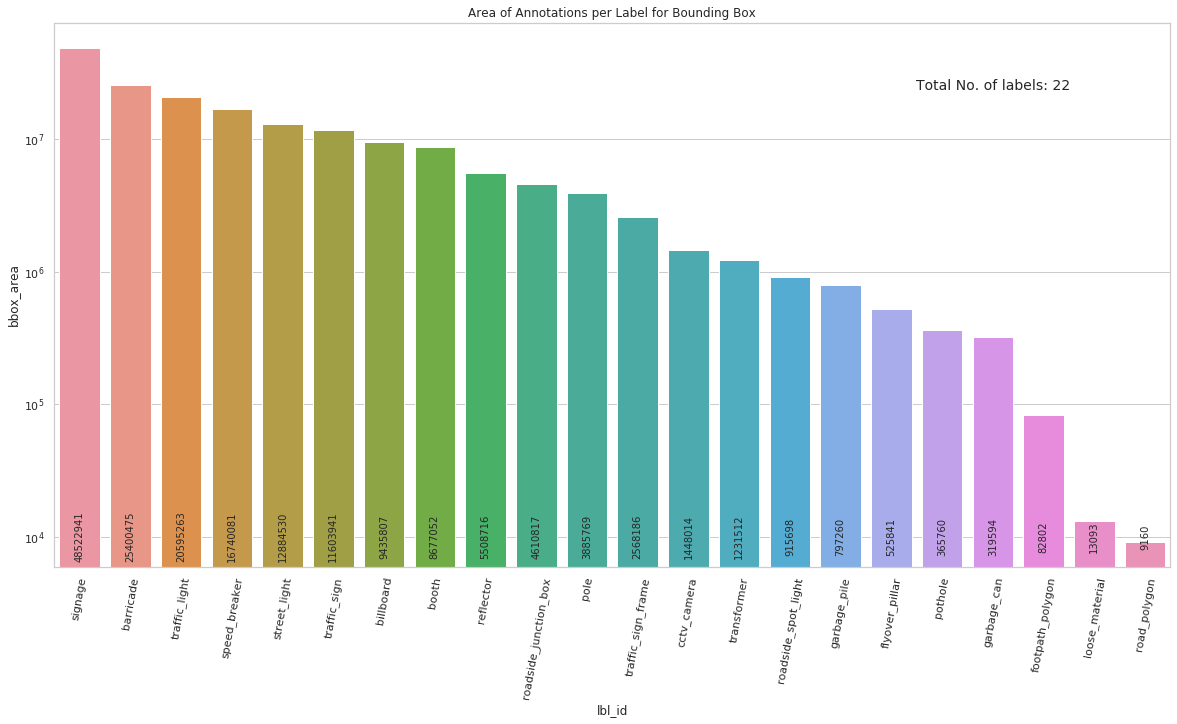

In [104]:
plt.figure(figsize=(20,10))
sns.barplot(x='lbl_id', y = 'bbox_area', data =area_label_bbox_df)
plt.yscale("log")
plt.xticks(rotation=80)
plt.title("Area of Annotations per Label for Bounding Box")

#for i, j in enumerate(area_label):
#    plt.text(x = i-0.38 , y = j, s = j, size=11)

for i, j in enumerate(sorted_area_label_bbox):
    plt.text(x = i , y = 10000, s = j[1], size=10, rotation=90, horizontalalignment='center', verticalalignment='center')
plt.text(x=18, y=25000000, s="Total No. of labels: {}".format(len(area_label_bbox_df)), horizontalalignment='center', verticalalignment='center', size=14)

plt.savefig('{}/area_of_annotation_per_label_bbox'.format(plot_path), dpi=100, bbox_inches='tight')

plt.show()

In [105]:
comb_dict = {}
for i in range(len(area_label_df)):
    if area_label_df.lbl_id[i] in list(area_label_bbox_df.lbl_id):
        comb_dict[area_label_df.lbl_id[i]] = (area_label_df.mask_area[i] ,area_label_bbox[area_label_df.lbl_id[i]])
    else:
        comb_dict[area_label_df.lbl_id[i]] = (area_label_df.mask_area[i] ,0)
        
comb_dict

{'loose_material': (562035085, 13093),
 'traffic_sign_frame': (23300661, 2568186),
 'footpath_polygon': (308624445, 82802),
 'lane_marking': (71433412, 0),
 'road_polygon': (2481871788, 9160),
 'pole': (76303326, 3885769),
 'roadside_spot_light': (1116954, 915698),
 'signage': (58275293, 48522941),
 'street_light': (67531388, 12884530),
 'traffic_sign': (25942943, 11603941),
 'traffic_light': (3358038, 20595263),
 'reflector': (1288266, 5508716),
 'barricade': (10827698, 25400475),
 'billboard': (14766685, 9435807),
 'cctv_camera': (254203, 1448014),
 'roadside_junction_box': (4091467, 4610817),
 'garbage_can': (297715, 319594),
 'crosswalk': (89087176, 0),
 'speed_breaker': (91559438, 16740081),
 'booth': (2984839, 8677052),
 'transformer': (1286905, 1231512),
 'flyover_pillar': (226986153, 525841),
 'pothole': (18188490, 365760),
 'garbage_pile': (6127418, 797260),
 'lane_arrow_marking': (568545, 0),
 'traffic_pole': (2189, 0)}

In [106]:
new_df = pd.DataFrame(comb_dict).T.reset_index()
new_df.columns = ["labels", "mask_area", "bbox_area"]
new_df.head()

,labels,mask_area,bbox_area
0,loose_material,562035085,13093
1,traffic_sign_frame,23300661,2568186
2,footpath_polygon,308624445,82802
3,lane_marking,71433412,0
4,road_polygon,2481871788,9160


In [107]:
#Uncomment next line to export csv file of img_per_label_df dataframe
new_df.to_csv('{}/mask_and_bbox_area_per_label.csv'.format(csv_path))

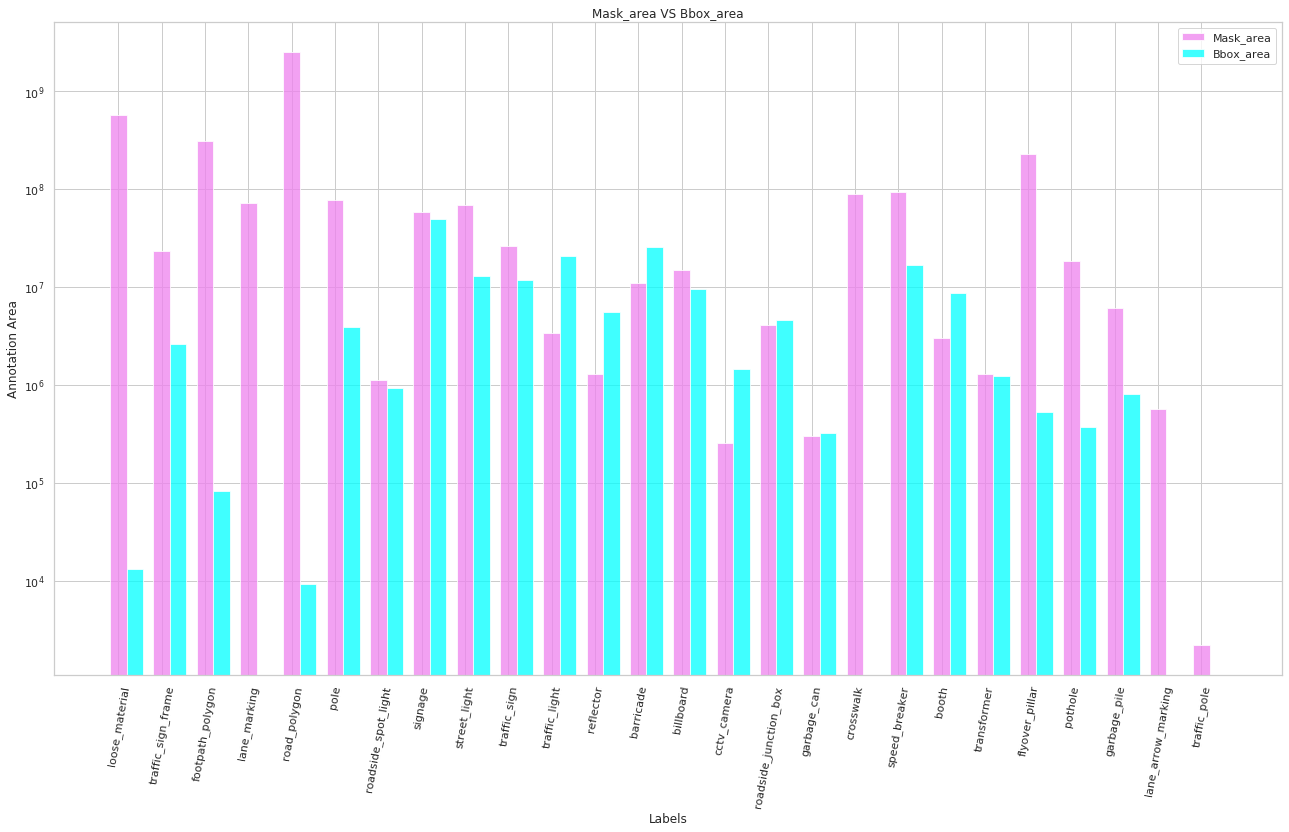

In [108]:
# data to plot
n_groups = 26
mask = list(new_df.mask_area)
bbox = list(new_df.bbox_area)

# create plot
#fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.38
opacity = 0.75

plt.figure(figsize=(22,12))

rects1 = plt.bar(index, mask, bar_width,
alpha=opacity,
color='violet',
label='Mask_area')

rects2 = plt.bar(index + bar_width, bbox, bar_width,
alpha=opacity,
color='cyan',
label='Bbox_area')

plt.yscale("log")

plt.xlabel('Labels')
plt.ylabel('Annotation Area')
plt.title('Mask_area VS Bbox_area')
plt.xticks(index , (list(new_df.labels)), rotation=80)
plt.legend()

plt.savefig('{}/mask_area_vs_bbox_area'.format(plot_path), dpi=100, bbox_inches='tight')

#plt.tight_layout()
plt.show()

In [109]:
polygon_label = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="polygon":
        if annot_df.lbl_id[i] in polygon_label.keys():
            polygon_label[annot_df.lbl_id[i]] = polygon_label[annot_df.lbl_id[i]] + 1
        else:
            polygon_label[annot_df.lbl_id[i]] = 1

In [110]:
bbox_label = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="rect":
        if annot_df.lbl_id[i] in bbox_label.keys():
            bbox_label[annot_df.lbl_id[i]] = bbox_label[annot_df.lbl_id[i]] + 1
        else:
            bbox_label[annot_df.lbl_id[i]] = 1

In [111]:
label_annot_df = pd.DataFrame(sorted(bbox_label.items()))
label_annot_df.columns = ["labels", "bbox"]
label_annot_df.head()

,labels,bbox
0,barricade,1569
1,billboard,1683
2,booth,436
3,cctv_camera,4329
4,flyover_pillar,91


In [112]:
temp_df = pd.DataFrame(sorted(polygon_label.items()))
temp_df.columns = ["labels", "polygon"]
temp_df.head()

,labels,polygon
0,barricade,588
1,billboard,2952
2,booth,119
3,cctv_camera,140
4,crosswalk,847


In [113]:
n_comb_dict = {}
for i in range(len(temp_df)):
    if temp_df.labels[i] in list(label_annot_df.labels):
        n_comb_dict[temp_df.labels[i]] = (temp_df.polygon[i] ,bbox_label[temp_df.labels[i]])
    else:
        n_comb_dict[temp_df.labels[i]] = (temp_df.polygon[i] ,0)
        
# n_comb_dict

In [114]:
n_comb_df = pd.DataFrame(n_comb_dict).T
n_comb_df.reset_index(level=0, inplace=True)
n_comb_df.columns = ["Labels", "Polygon", "BBox"]
n_comb_df.head()

,Labels,Polygon,BBox
0,barricade,588,1569
1,billboard,2952,1683
2,booth,119,436
3,cctv_camera,140,4329
4,crosswalk,847,0


In [115]:
#Uncomment next line to export csv file of img_per_label_df dataframe
n_comb_df.to_csv('{}/mask_and_bbox_number_per_label.csv'.format(csv_path))

In [116]:
plot_df = pd.melt(n_comb_df, id_vars='Labels', var_name="Legend", value_name="Total Numbers")
plot_df.head()

,Labels,Legend,Total Numbers
0,barricade,Polygon,588
1,billboard,Polygon,2952
2,booth,Polygon,119
3,cctv_camera,Polygon,140
4,crosswalk,Polygon,847


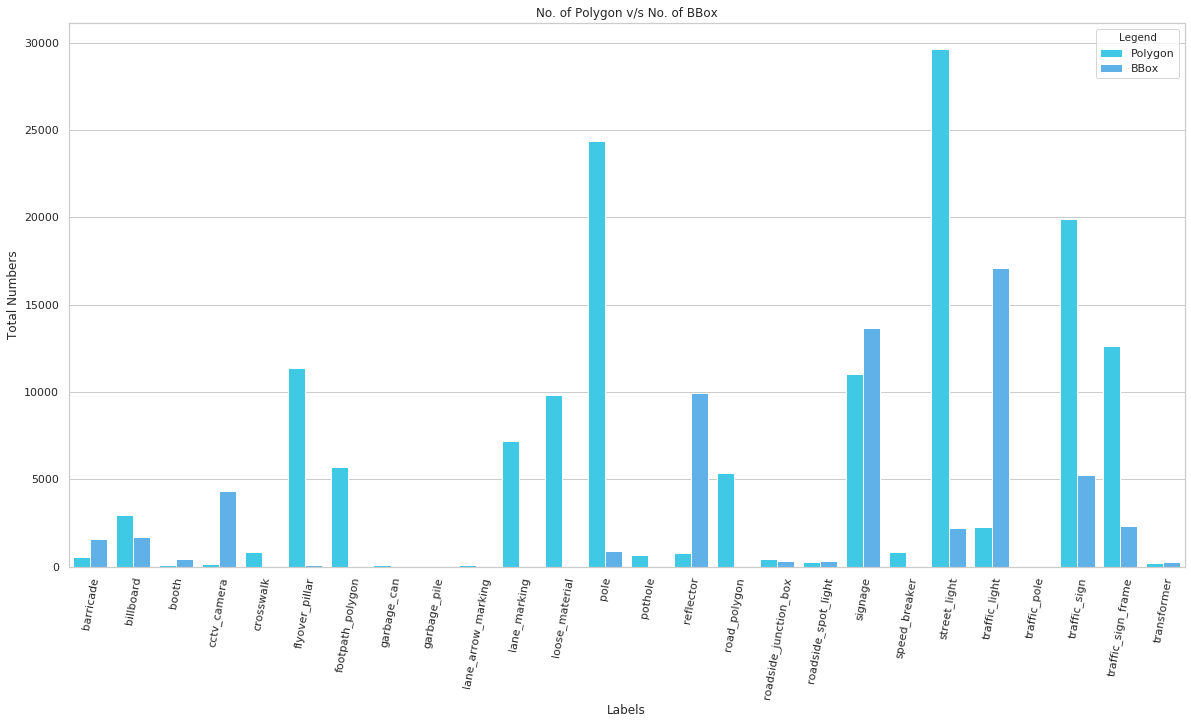

In [117]:
sns.set(style='whitegrid')
sns.set_palette("cool")
plt.figure(figsize=(20,10))
sns.barplot(x='Labels', y = 'Total Numbers', hue='Legend', data =plot_df)
plt.xticks(rotation=80)
plt.title("No. of Polygon v/s No. of BBox")

plt.savefig('{}/number_of_polygons_vs_bbox'.format(plot_path), dpi=100, bbox_inches='tight')

plt.show()

In [120]:
os.chdir(plot_path)

In [121]:
out_fname = "../plots.pdf"

In [122]:
images = []
for i in range(len(os.listdir(plot_path))):
    fname = os.listdir(plot_path)[i]
    print(fname)
    # Load the current image and store it
    im = Image.open(fname)
    # (Optional) Process the image if necessary ...
    # Pillow can't save RGBA images to pdf,
    # make sure the image is RGB
    if im.mode == "RGBA":
        im = im.convert("RGB")
    # Add the image to the images list
    images.append(im)

images_per_label_bar.png
mask_area_vs_bbox_area.png
number_of_images_vs_annotations.png
area_of_annotation_per_label_polygon.png
area_of_annotation_per_label_bbox.png
images_per_label_line.png
number_of_polygons_vs_bbox.png
annotations_per_label_bar.png
annotations_per_label_line.png


In [123]:
for i in range(len(os.listdir(plot_path))):
    images[0].save(out_fname, save_all = True, quality=100, append_images = images[1:])